In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## EDA

In [50]:
df = pd.read_csv("tweet_data3.csv")

In [51]:
df

,large_class_ip_name,product_date,product_count,product_mean,product_median,three_month_count,three_month_mean,three_month_median,six_month_count,six_month_mean,six_month_median
0,ディーふらぐ!,2014-01-11,14,59.928571,50.5,52,52.615385,30.0,NaN,NaN,NaN
1,うちの師匠はしっぽがない,2022-11-09,12,219.916667,178.0,30,341.133333,277.5,22.0,1448.409091,268.5
2,日常,2011-04-17,13,20.615385,18.0,1,4.000000,4.0,NaN,NaN,NaN
3,戦国BASARA,2011-04-14,54,21.814815,16.0,12,19.166667,19.0,NaN,NaN,NaN
4,スロウスタート,2017-08-09,1,520.000000,520.0,4,2429.750000,2266.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
702,夜は猫といっしょ,2022-06-29,6,5198.333333,3230.5,29,6673.000000,3555.0,NaN,NaN,NaN
703,魔法陣グルグル,2022-10-13,10,371.800000,233.0,10,310.200000,200.0,NaN,NaN,NaN
704,究極進化したフルダイブRPGが現実よりもクソゲーだったら,2021-03-26,15,133.000000,121.0,63,356.031746,123.0,NaN,NaN,NaN
705,ジャヒー様はくじけない!,2021-08-01,5,1622.600000,1553.0,41,1459.073171,647.0,NaN,NaN,NaN


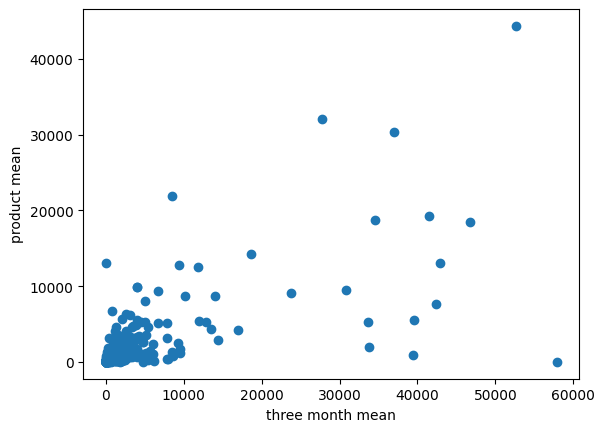

In [52]:
x = df['three_month_mean']
y = df['product_mean']
plt.scatter(x,y)

plt.xlabel('three month mean')
plt.ylabel('product mean')
plt.show()

In [53]:
print(x.corr(y))

0.6920879900127871


In [54]:
x = df[['three_month_mean']]
y = df[['product_mean']]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)



In [55]:
print(model.intercept_)
print(model.coef_)

[464.13994787]
[[0.29197214]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


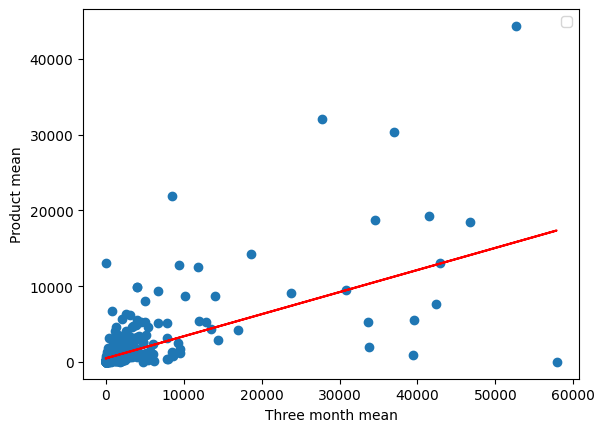

In [56]:
x = df[['three_month_mean']]
y = df[['product_mean']]

model.fit(x_train,y_train)

intercept = model.intercept_
coefficient = model.coef_[0]

#equation_label = f'Y = {intercept:.2f} + {coefficient:.2f} * X'


plt.scatter(x,y)
plt.plot(x, model.intercept_ + model.coef_ *x, color = 'red')
#plt.text(3,7,equation_label, font_size =12)

plt.xlabel('Three month mean')
plt.ylabel('Product mean')
plt.legend()
plt.show()

Mean Squared Error: 12045089.071775319
R-squared Score: 0.3911450493914156


C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


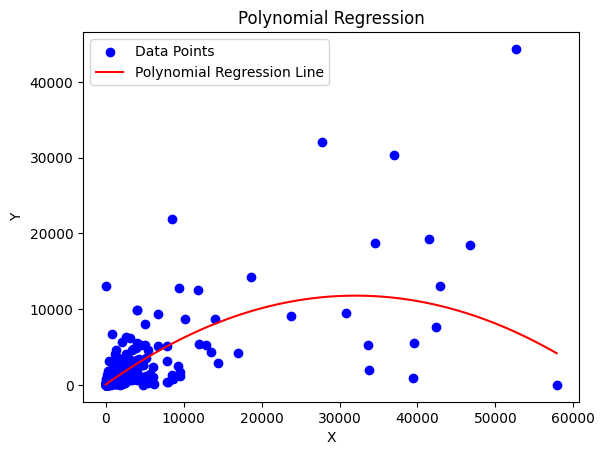

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

X = df[['three_month_mean']]
y = df[['product_mean']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degree = 2  # degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


X_line = np.linspace(X.min(), X.max(), 100)
X_line_poly = poly_features.transform(X_line.reshape(-1, 1))
y_line_pred = model.predict(X_line_poly)

# Plot the data points and polynomial regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_line, y_line_pred, color='red', label='Polynomial Regression Line')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [58]:
new = pd.read_csv('new_tweet.csv')

In [59]:
new

,large_class_ip_name,product_date,product_count,product_mean,product_median,three_month_count,three_month_mean,three_month_median,six_month_count,six_month_mean,six_month_median
0,あの日見た花の名前を僕達はまだ知らない。,2011-02-23,36,16.444444,15.0,6,12.000000,9.0,NaN,NaN,NaN
1,ビッグオーダー,2016-04-15,17,34.000000,18.0,17,76.705882,18.0,NaN,NaN,NaN
2,映像研には手を出すな!,2019-12-30,7,1392.571429,1032.0,48,236.020833,128.0,6.0,633.333333,134.5
3,しぐれうい,2020-04-04,8,5259.375000,2956.0,238,4534.936975,2237.5,NaN,NaN,NaN
4,無能なナナ,2020-09-07,76,180.486842,145.0,26,678.615385,454.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
699,私に天使が舞い降りた!,2018-11-19,19,917.736842,588.0,11,363.545455,391.0,NaN,NaN,NaN
700,ヒーラーガールズ,2022-01-28,3,146.666667,162.0,1,2100.000000,2100.0,NaN,NaN,NaN
701,原神,2020-02-21,1,545.000000,545.0,9,1006.111111,527.0,NaN,NaN,NaN
702,土下座で頼んでみた,2020-09-30,2,270.000000,270.0,8,504.500000,66.0,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[284.28078822]
[0.41114258]


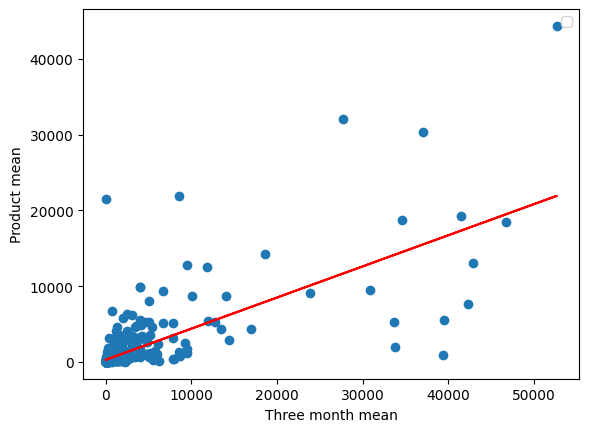

In [60]:
x = new[['three_month_mean']]
y = new[['product_mean']]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)


intercept = model.intercept_
coefficient = model.coef_[0]

print(intercept)
print(coefficient)

#equation_label = f'Y = {intercept:.2f} + {coefficient:.2f} * X'


plt.scatter(x,y)
plt.plot(x, model.intercept_ + model.coef_ *x, color = 'red')
#plt.text(3,7,equation_label, font_size =12)

plt.xlabel('Three month mean')
plt.ylabel('Product mean')
plt.legend()
plt.show()

In [61]:
x = new['three_month_mean']
y = new['product_mean']
print(x.corr(y))

0.7298541498740498


In [62]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.3932200214925383


### Findings

It seems that x value and y value do not have a strong correlation, so I will try to categoriese them by ip genres (Eg:love story, thriller..etc) and types (Eg: Manga, games, anime)

Furthermore, linear regression seemed better than polynomial regression looking at the graph drawn

# Prediction

Looking at the graph, it seemed that there were some outliers in the graph (mainly the favrt count is too high). In fact, many of the ip requested for predicition do not have such high FavRT count. Therefore it is safe to remove those.

## IP genre

In [104]:
tweet_genre1 = pd.read_csv('tweet_data_genre.csv')


Since the ip genre names are in Japanese, it is changed to English

In [106]:
dict = {'ドラマ/青春': 'dorama/seishun', 'SF/ファンタジー':'SF/fantasy','恋愛/ラブコメ':'love','コメディ/ギャグ':'comedy', 'アクション/バトル':'action'}

tweet_genre1['event_content'] = tweet_genre1['event_content'].replace(dict)


### IQR method

All points that lie outside the range defined by the quartiles +/- 1.5 * IQR are removed

In [107]:
Q1 = tweet_genre1['product_mean'].quantile(0.25)
Q3 = tweet_genre1['product_mean'].quantile(0.75)
IQR = Q3 - Q1

# define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# create a new DataFrame that excludes outliers
df = tweet_genre1[(df['product_mean'] >= lower_threshold) & (tweet_genre1['product_mean'] <= upper_threshold)]

Q1 = tweet_genre1['three_month_mean'].quantile(0.25)
Q3 = tweet_genre1['three_month_mean'].quantile(0.75)
IQR = Q3 - Q1

# define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# create a new DataFrame that excludes outliers
tweet_genre1 = tweet_genre1[(tweet_genre1['three_month_mean'] >= lower_threshold) & (tweet_genre1['three_month_mean'] <= upper_threshold)]

Graphs are drawn for each ip genre

The equation for category dorama/seishun is: 
  
0.5107 x + 172.3


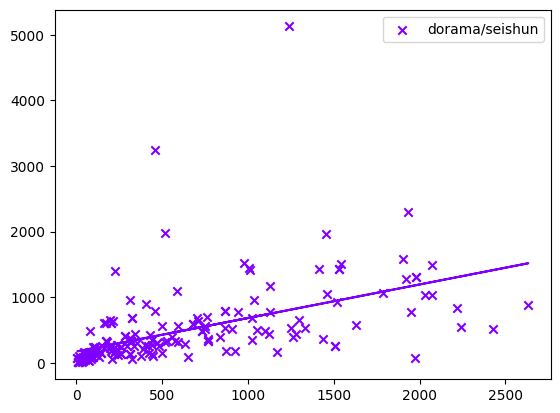

The equation for category comedy is: 
  
0.3498 x + 385.3


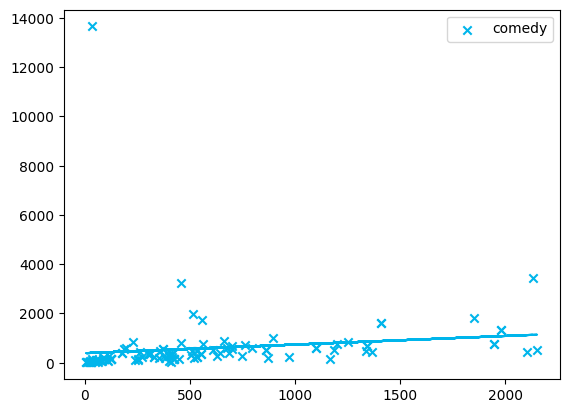

The equation for category SF/fantasy is: 
  
0.4619 x + 169.8


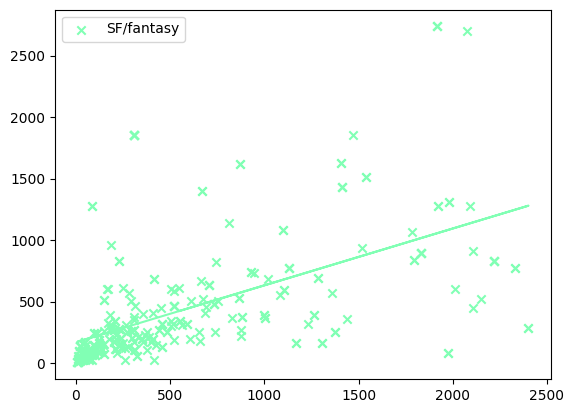

The equation for category action is: 
  
0.3821 x + 269.2


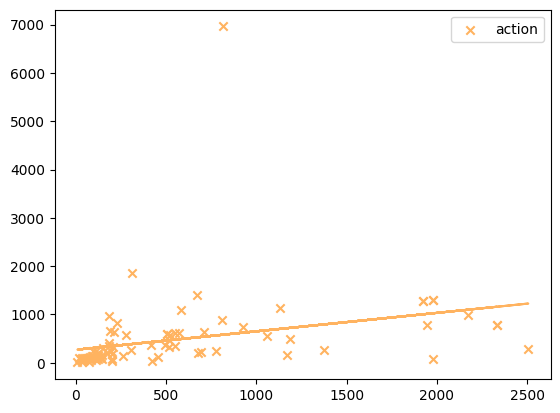

The equation for category love is: 
  
0.7055 x + 69.03


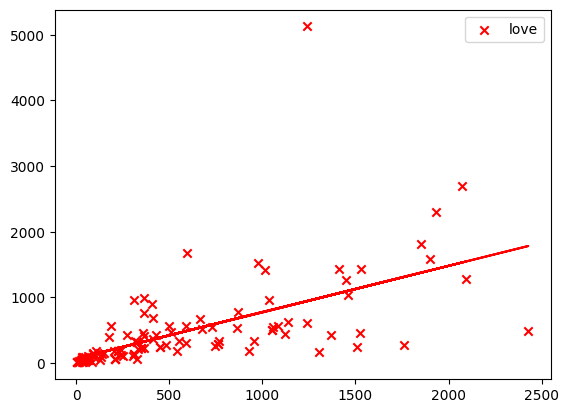

In [108]:
# Get the list of unique categories
categories = tweet_genre1['event_content'].unique()

# Create a colormap based on the number of categories
colors = cm.rainbow(np.linspace(0, 1, len(categories)))

# Create a dictionary mapping category to color
color_dict = {category: color for category, color in zip(categories, colors)}

for category in categories:
    subset = tweet_genre1[tweet_genre1['event_content'] == category]
    plt.scatter(subset['three_month_mean'], subset['product_mean'], label=category, color=color_dict[category], marker='x')
    
    p = np.polyfit(subset['three_month_mean'], subset['product_mean'], 1)
    # Create a function that represents the line
    f = np.poly1d(p)
    # Draw the line
    plt.plot(subset['three_month_mean'], f(subset['three_month_mean']), color=color_dict[category])

    f = np.poly1d(p)
    # Print the equation
    print("The equation for category", category, "is: \n", f)
    
    plt.legend()
    plt.show()
    






### Simple Data Cleaning

Remove all points that have a favrt count bigger than 10,000 or equal to 0. Looking at the graph, it seems that those points are the outliers. 

In [109]:
tweet_genre2 = pd.read_csv('tweet_data_genre.csv')


dict = {'ドラマ/青春': 'dorama/seishun', 'SF/ファンタジー':'SF/fantasy','恋愛/ラブコメ':'love','コメディ/ギャグ':'comedy', 'アクション/バトル':'action'}

tweet_genre2['event_content'] = tweet_genre2['event_content'].replace(dict)


In [85]:
tweet_genre2 = tweet_genre2[tweet_genre2['product_mean'] > 0]
tweet_genre2 = tweet_genre2[tweet_genre2['three_month_mean'] > 0]

tweet_genre2 = tweet_genre2[tweet_genre2['product_mean'] < 10000]
tweet_genre2 = tweet_genre2[tweet_genre2['three_month_mean'] < 10000]

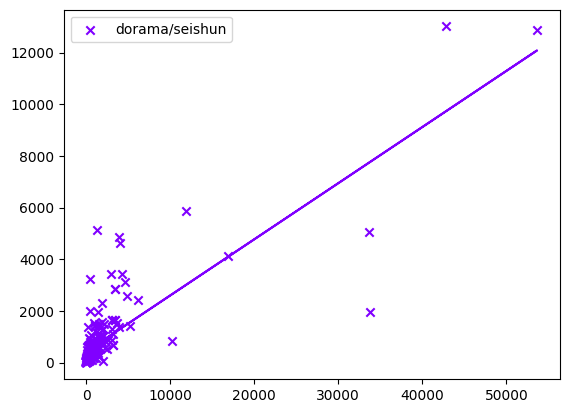

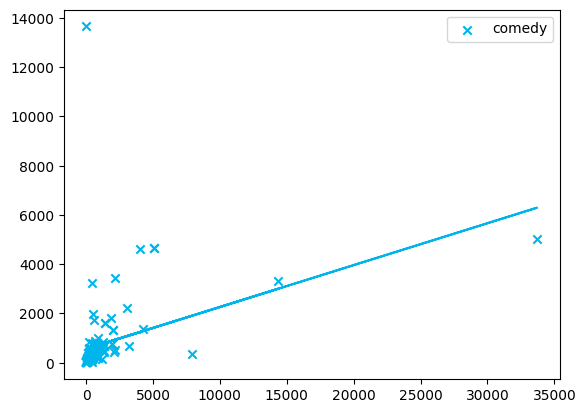

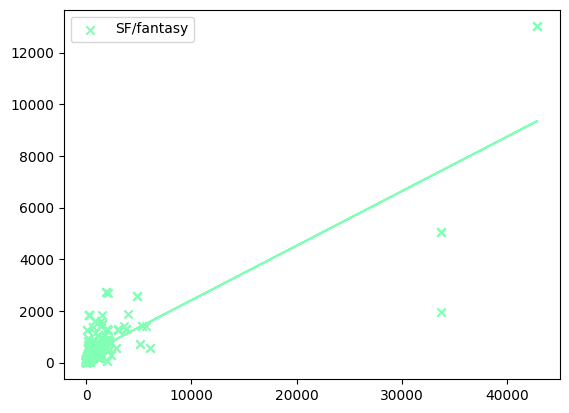

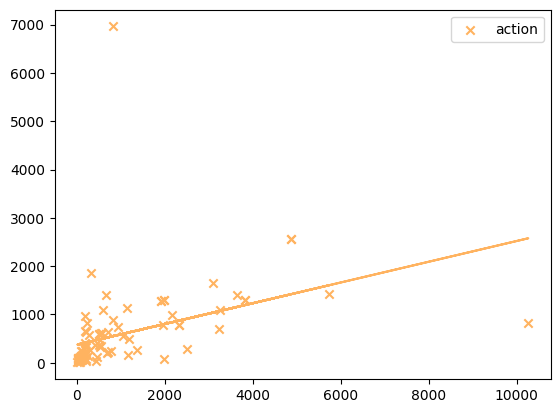

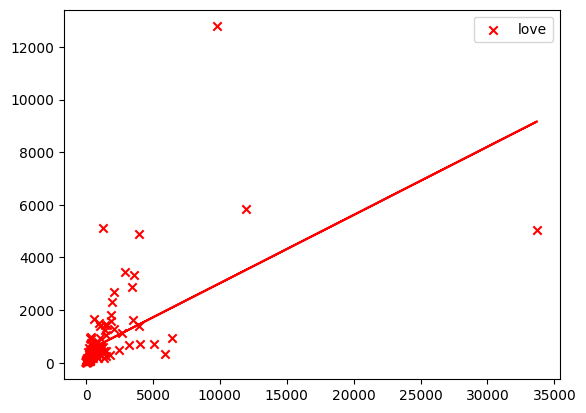

In [110]:
# Get the list of unique categories
categories = tweet_genre2['event_content'].unique()

# Create a colormap based on the number of categories
colors = cm.rainbow(np.linspace(0, 1, len(categories)))

# Create a dictionary mapping category to color
color_dict = {category: color for category, color in zip(categories, colors)}

for category in categories:
    subset = tweet_genre2[tweet_genre2['event_content'] == category]
    plt.scatter(subset['three_month_mean'], subset['product_mean'], label=category, color=color_dict[category], marker='x')
    
    p = np.polyfit(subset['three_month_mean'], subset['product_mean'], 1)
    # Create a function that represents the line
    f = np.poly1d(p)
    # Draw the line
    plt.plot(subset['three_month_mean'], f(subset['three_month_mean']), color=color_dict[category])

    plt.legend()
    plt.show()



## IP type

### IQR method

All points that lie outside the range defined by the quartiles +/- 1.5 * IQR are removed

In [111]:
tweet_type1 = pd.read_csv("tweet_data_type.csv")

dict = {'漫画': 'manga', 'ライトノベル':'light novel','アニメ':'anime','ゲーム':'game'}

tweet_type1['ip_type'] =tweet_type1['ip_type'].replace(dict)

In [97]:
Q1 = tweet_type1['product_mean'].quantile(0.25)
Q3 = tweet_type1['product_mean'].quantile(0.75)
IQR = Q3 - Q1

# define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# create a new DataFrame that excludes outliers
df = tweet_type1[(tweet_type1['product_mean'] >= lower_threshold) & (tweet_type1['product_mean'] <= upper_threshold)]

Q1 = tweet_type1['three_month_mean'].quantile(0.25)
Q3 = tweet_type1['three_month_mean'].quantile(0.75)
IQR = Q3 - Q1

# define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# create a new DataFrame that excludes outliers
tweet_type1 = tweet_type1[(tweet_type1['three_month_mean'] >= lower_threshold) & (tweet_type1['three_month_mean'] <= upper_threshold)]

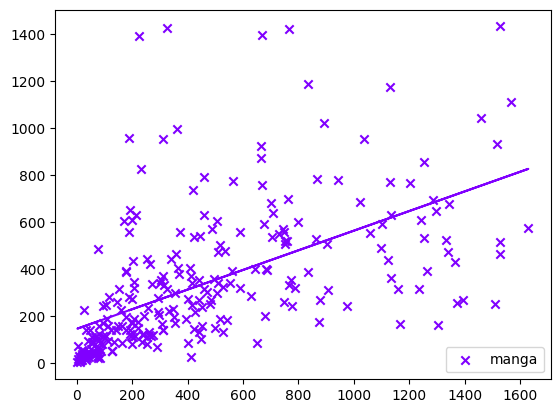

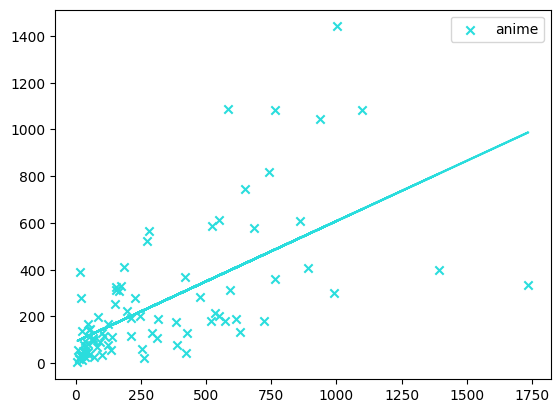

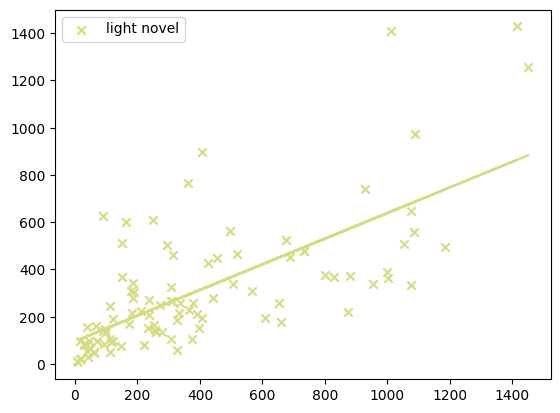

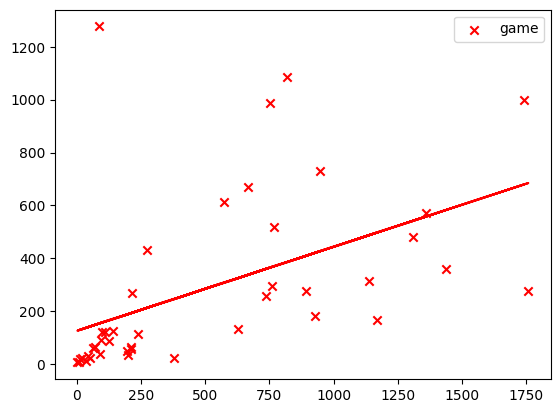

In [98]:
# Get the list of unique categories
categories = tweet_type1['ip_type'].unique()

# Create a colormap based on the number of categories
colors = cm.rainbow(np.linspace(0, 1, len(categories)))

# Create a dictionary mapping category to color
color_dict = {category: color for category, color in zip(categories, colors)}

for category in categories:
    subset = tweet_type1[tweet_type1['ip_type'] == category]
    plt.scatter(subset['three_month_mean'], subset['product_mean'], label=category, color=color_dict[category], marker='x')
    
    p = np.polyfit(subset['three_month_mean'], subset['product_mean'], 1)
    # Create a function that represents the line
    f = np.poly1d(p)
    # Draw the line
    plt.plot(subset['three_month_mean'], f(subset['three_month_mean']), color=color_dict[category])

    plt.legend()
    plt.show()



### Simple Data Cleaning

Remove all points that have a favrt count bigger than 10,000 or equal to 0. Looking at the graph, it seems that those points are the outliers. 

In [112]:
tweet_type2 = pd.read_csv("tweet_data_type.csv")

dict = {'漫画': 'manga', 'ライトノベル':'light novel','アニメ':'anime','ゲーム':'game'}

tweet_type2['ip_type'] =tweet_type2['ip_type'].replace(dict)

In [113]:
tweet_type2 = tweet_type2[tweet_type2['product_mean'] > 0]
tweet_type2 = tweet_type2[tweet_type2['three_month_mean'] > 0]

tweet_type2 = tweet_type2[tweet_type2['product_mean'] < 10000]
tweet_type2 = tweet_type2[tweet_type2['three_month_mean'] < 10000]

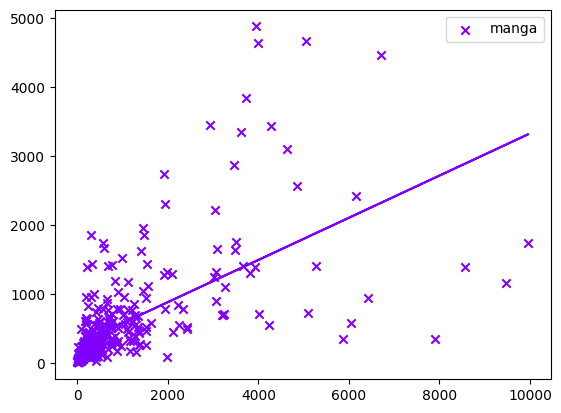

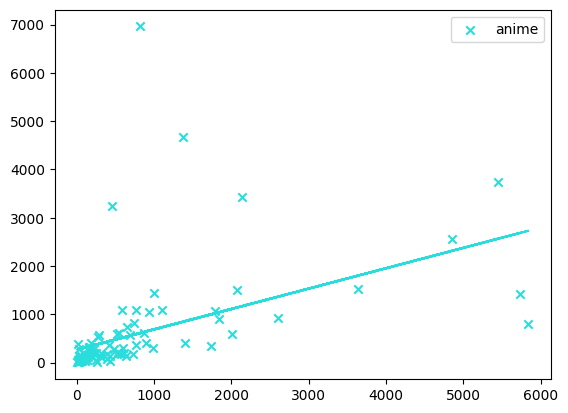

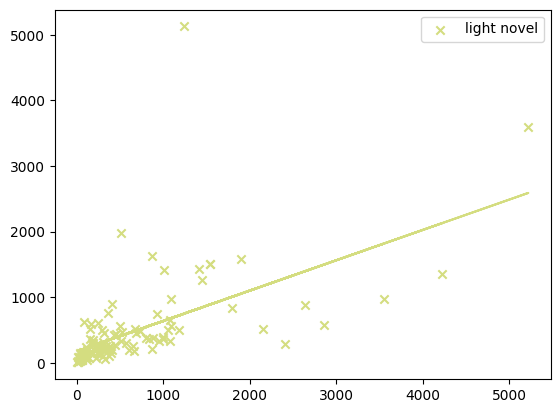

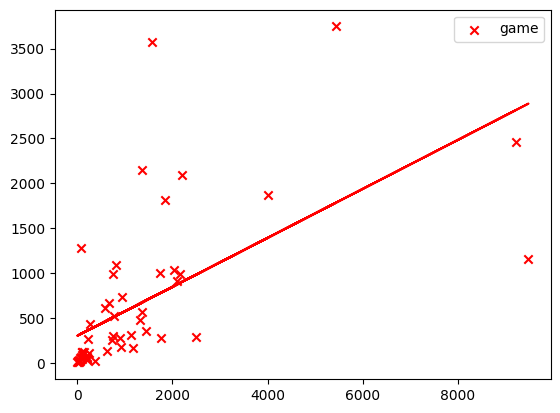

In [114]:
# Get the list of unique categories
categories = tweet_type2['ip_type'].unique()

# Create a colormap based on the number of categories
colors = cm.rainbow(np.linspace(0, 1, len(categories)))

# Create a dictionary mapping category to color
color_dict = {category: color for category, color in zip(categories, colors)}

for category in categories:
    subset = tweet_type2[tweet_type2['ip_type'] == category]
    plt.scatter(subset['three_month_mean'], subset['product_mean'], label=category, color=color_dict[category], marker='x')
    
    p = np.polyfit(subset['three_month_mean'], subset['product_mean'], 1)
    # Create a function that represents the line
    f = np.poly1d(p)
    # Draw the line
    plt.plot(subset['three_month_mean'], f(subset['three_month_mean']), color=color_dict[category])

    plt.legend()
    plt.show()

